In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
data = pd.read_csv("data.csv")
display(data)

,goals_ht,goals_at,home_t,away_t,formation_ht,formation_at
0,1,1,Inter,Milan,3-5-2,4-4-2
1,0,1,Inter,Milan,5-3-2,5-4-1
2,1,2,Inter,Milan,3-5-2,4-3-3
3,4,2,Inter,Milan,4-3-3,4-3-3
4,1,1,Inter,Milan,4-3-3,4-5-1
...,...,...,...,...,...,...
195,2,1,Milan,Inter,3-4-3,4-3-3
196,3,3,Milan,Inter,5-3-2,3-4-3
197,1,1,Milan,Inter,3-5-2,3-4-3
198,2,3,Milan,Inter,3-4-3,4-5-1


In [3]:
# Funzione CountFormations
# INPUT: il nome di un team e come secondo parametro la stringa 'ht' o 'at' 
#         per indicare se bisogna considerare le partite in cui il team ha giocato in casa o fuori casa rispettivamente
# OUTPUT: plot a barre che indica quante volte sono stati usati i vari moduli 
#         (siccome c'e' una chiamata alla funzione WinPercFormations ottengo anche il suo output)

def CountFormations(team, where):
    if(where == 'ht'):
        formations=data.loc[lambda x: ((x['home_t'] == team)),['formation_ht']]
        formations_grouped=formations.groupby(['formation_ht'],as_index=False).size()
        
        plt.figure(figsize=(12,4))
        plt.bar(formations_grouped['formation_ht'],formations_grouped['size'])
        plt.title('Moduli '+ team +' in casa', fontsize=20)
        plt.ylabel('usato', fontsize=15)
        plt.grid(alpha=.2)
        plt.margins(.05)
        plt.show()
        
        WinPercFormations(data, team, where)
        
    if(where == 'at'):
        formations=data.loc[lambda x: ((x['away_t'] == team)),['formation_at']]
        formations_grouped=formations.groupby(['formation_at'],as_index=False).size()
        
        plt.figure(figsize=(12,4))
        plt.bar(formations_grouped['formation_at'],formations_grouped['size'])
        plt.title('Moduli '+ team +' fuori casa', fontsize=20)
        plt.ylabel('usato', fontsize=15)
        plt.grid(alpha=.2)
        plt.margins(.05)
        plt.show()
        
        WinPercFormations(data, team, where)       

In [4]:
# Funzione WinPercFormations
# INPUT: data set di partite da analizzare, il nome di un team e come terzo parametro la stringa 'ht' o 'at' 
#         per indicare se bisogna considerare le partite in cui il team ha giocato in casa o fuori casa rispettivamente
# OUTPUT: dataframe in formato tabella che mostra per ogni modulo la percentuale di utilizzo, n. vinte, n.pareggi, n. perse
#         e la percentuale di vittoria

def WinPercFormations(partite, team, where):    
       
    if(where == 'ht'):
        string1 = 'home_t'
        string2 = 'formation_ht'
        string3 = 'goals_ht'
        string4 = 'goals_at'
    if(where == 'at'):
        string1 = 'away_t'
        string2 = 'formation_at'
        string3 = 'goals_at'
        string4 = 'goals_ht'
        
        
    formations=data.loc[lambda x: ((x[string1] == team)),[string2]]
    formations_grouped=formations.groupby([string2],as_index=False).size()
    totUsed = formations_grouped['size'].sum()
    Perc_Used = []
    for index, row in formations_grouped.iterrows():
        perc = (100*row['size'])/totUsed
        Perc_Used.append((row[0], perc))
    
    
    ListFormations = pd.Series(partite[string2].unique())
    ListFormations.sort_values(ascending  = True, inplace = True)
    ListPerc = []
    i = -1
    for formation in ListFormations:
        partite_x = partite.loc[lambda x: ((x[string2] == formation) & (x[string1] == team))]
        totPartite_x = len(partite_x.index)
        Wins = 0
        Draws = 0
        for index, row in partite_x.iterrows():
            if(row[string3] > row[string4]):
                Wins = Wins + 1
            elif(row[string3] == row[string4]):
                Draws = Draws + 1
        Losses = totPartite_x - Wins - Draws
        PercWin = "%.2f" % (Wins / (totPartite_x) * 100)
        i = i + 1
        ListPerc.append([formation, Perc_Used[i][1], Wins, Draws, Losses, PercWin])
        
    PercWin_df = pd.DataFrame.from_records(ListPerc, columns =['Modulo', 'PercUse','Wins', 'Draws', 'Losses', 'PercWin'])
    display(PercWin_df)
    print("\n")

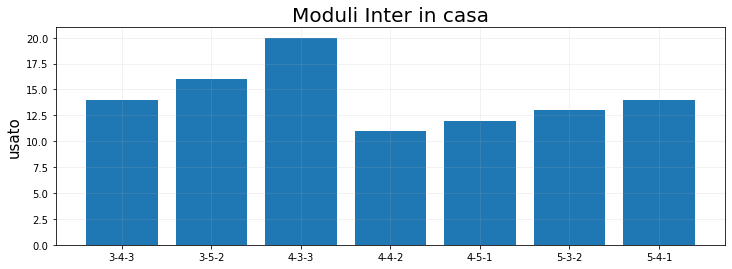

,Modulo,PercUse,Wins,Draws,Losses,PercWin
0,3-4-3,14.0,5,2,7,35.71
1,3-5-2,16.0,7,3,6,43.75
2,4-3-3,20.0,11,3,6,55.00
3,4-4-2,11.0,3,4,4,27.27
4,4-5-1,12.0,6,3,3,50.00
5,5-3-2,13.0,4,4,5,30.77
6,5-4-1,14.0,6,4,4,42.86


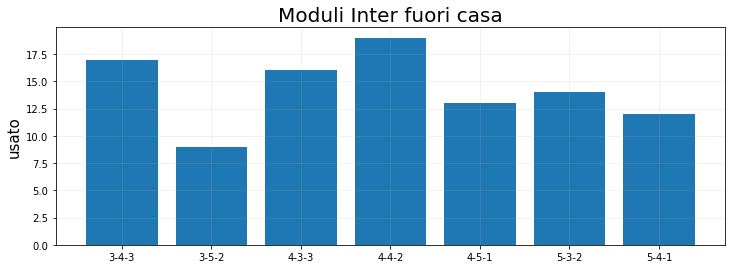

,Modulo,PercUse,Wins,Draws,Losses,PercWin
0,3-4-3,17.0,10,3,4,58.82
1,3-5-2,9.0,4,3,2,44.44
2,4-3-3,16.0,5,4,7,31.25
3,4-4-2,19.0,6,5,8,31.58
4,4-5-1,13.0,7,2,4,53.85
5,5-3-2,14.0,4,3,7,28.57
6,5-4-1,12.0,6,2,4,50.00


In [5]:
# Inter in casa
CountFormations('Inter', 'ht')

# Inter fuori casa
CountFormations('Inter', 'at')

# Milan in casa
#CountFormations('Milan', 'ht')

# Milan fuori casa
#CountFormations('Milan', 'at')

In [6]:
# Funzione PercPoisson
# INPUT: il nome di un team e come secondo parametro la stringa 'ht' o 'at' 
#         per indicare se bisogna considerare le partite in cui il team ha giocato in casa o fuori casa rispettivamente
# OUTPUT: due grafici che mostrano l'analisi di regressione del numero di goal sia per la squadra che ha giocato in casa 
#         che fuori casa e una tabella che mostra la probabilita' dei possibili risulutati di una eventuale partita

def PercPoisson(team, where):
    
    if(where == 'ht'):
        string = 'home_t'
    if(where == 'at'):
        string = 'away_t'
            
    partite = data.loc[lambda x: ((x[string] == team))]
    totPartite = len(partite.index)
    totGoals_ht = partite['goals_ht'].sum()
    totGoals_at = partite['goals_at'].sum()
    
    l_ht = totGoals_ht / totPartite
    l_at = totGoals_at / totPartite
    x = range(7)
    
    # regressione Poisson
    
    # squadra in casa
    X_ht = st.poisson(l_ht)
    X_ht_pmf = X_ht.pmf(x)
    
    plt.figure(figsize=(12,4))
    plt.title('Regressione di Poisson goals '+partite['home_t'].iloc[0]+' (in casa)', fontsize=20)
    plt.ylabel('Perc', fontsize=15)
    plt.xlabel('Goals', fontsize=15)
    plt.grid(alpha=.2)
    plt.margins(.05)
    plt.vlines(x, [0]*len(x), X_ht_pmf)
    plt.plot(x, X_ht.pmf(x), 'o')
    plt.show()
    
    # squadra fuori casa
    X_at = st.poisson(l_at)
    X_at_pmf = X_at.pmf(x)
    plt.figure(figsize=(12,4))
    plt.title('Regressione di Poisson goals '+partite['away_t'].iloc[0]+' (fuori casa)', fontsize=20)
    plt.ylabel('Perc', fontsize=15)
    plt.xlabel('Goals', fontsize=15)
    plt.grid(alpha=.2)
    plt.margins(.05)
    plt.vlines(x, [0]*len(x), X_at_pmf)
    plt.plot(x, X_at.pmf(x), 'o')
    plt.show()
    
    # tabella probabilita' risultati
    print( '\033[1m'+"\n\nTabella che mostra la probabilita' dei risultati\n(row indexes = goals "+partite['home_t'].iloc[0]+
           ", col indexes = goals "+partite['away_t'].iloc[0]+")" + '\033[1m')
    
    results_Poisson = []
    for x in X_ht_pmf:
        row = []
        for y in X_at_pmf:
            perc = "%.2f" % (x*y*100)
            row.append(perc)                
        results_Poisson.append(row)
        
    results_Poisson_df = pd.DataFrame(results_Poisson)
    display( results_Poisson_df)
    print("\n")

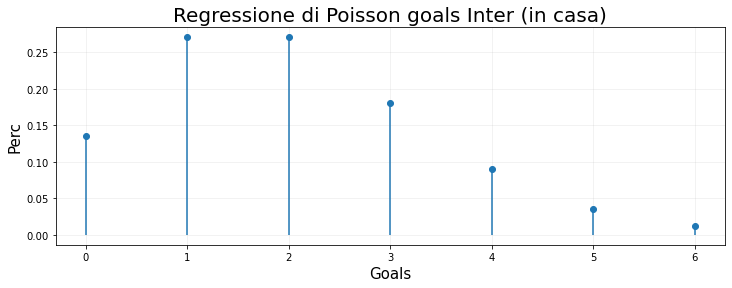

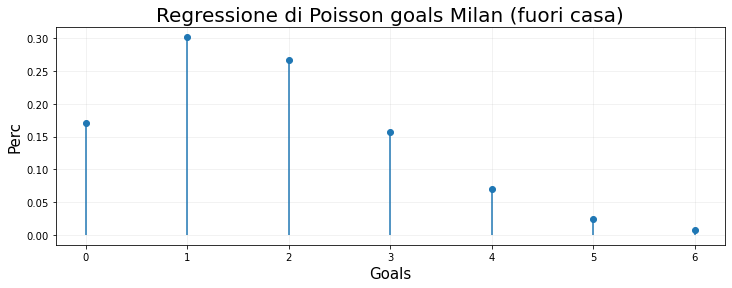



Tabella che mostra la probabilita' dei risultati
(row indexes = goals Inter, col indexes = goals Milan)


,0,1,2,3,4,5,6
0,2.31,4.08,3.61,2.13,0.94,0.33,0.10
1,4.61,8.16,7.22,4.26,1.89,0.67,0.20
2,4.61,8.16,7.22,4.26,1.89,0.67,0.20
3,3.07,5.44,4.81,2.84,1.26,0.44,0.13
4,1.54,2.72,2.41,1.42,0.63,0.22,0.07
5,0.61,1.09,0.96,0.57,0.25,0.09,0.03
6,0.20,0.36,0.32,0.19,0.08,0.03,0.01


In [7]:
# PercPoisson Inter in casa
PercPoisson('Inter', 'ht')

# PercPoisson Inter fuori casa
#PercPoisson('Inter', 'at')

# PercPoisson Milan in casa
#PercPoisson('Milan', 'ht')

# PercPoisson Milan fuori casa
#PercPoisson('Milan', 'at')

In [8]:
# Funzione FormationPercTable
# INPUT: data set da analizzare, il nome di un team e come secondo parametro la stringa 'ht' o 'at' 
#         per indicare se bisogna considerare le partite in cui il team ha giocato in casa o fuori casa rispettivamente
# OUTPUT: tabella che mostra la percentuale di vincita in base al modulo

def FormationPercTable(data, team, where):
    
    if(where == 'ht'):
        string = 'home_t'
    if(where == 'at'):
        string = 'away_t'
    
    Formations_ht = pd.Series(data['formation_ht'].unique())
    Formations_ht.sort_values(ascending  = True, inplace = True)
    Formations_ht = Formations_ht.reset_index(drop=True)
    Formations_at = pd.Series(data['formation_at'].unique())
    Formations_at.sort_values(ascending  = True, inplace = True)
    Formations_at = Formations_at.reset_index(drop=True)
    
    results_Formation = []
    for x in Formations_ht:
        row = []
        for y in Formations_at:
            partite = data.loc[lambda z: ((z[string] == team) & (z['formation_ht'] == x) & (z['formation_at'] == y))]
            if(not partite.empty):
                totPartite = len(partite.index)
                totWins_ht = 0
                totWins_at = 0
                for index, match in partite.iterrows():
                    if(match['goals_ht'] > match['goals_at']):
                        totWins_ht = totWins_ht + 1 
                    elif(match['goals_at'] > match['goals_ht']):
                        totWins_at = totWins_at + 1
            
                if(string == 'home_t'):
                    if(totWins_ht != 0):    
                        perc = "%.2f" % (totWins_ht/totPartite*100)
                    else: 
                        perc = 0
                        
                if(string == 'away_t'):
                    if(totWins_at != 0):    
                        perc = "%.2f" % (totWins_at/totPartite*100)
                    else: 
                        perc = 0
                row.append(perc)
               
        if(row):
            results_Formation.append(row)
        if(not partite.empty):
            team_ht = partite['home_t'].iloc[0]
            team_at = partite['away_t'].iloc[0] 
    print('\n\033[1m'+team.upper()+' (as '+string+')'+'\033[1m')
    print( '\033[1m'+"\n\nTabella che mostra la percentuale di vincita in base al modulo\n(row indexes = moduli "+team_ht+
                   ", col indexes = moduli "+team_at+")" + '\033[1m')  
    results_Formation_df = pd.DataFrame(results_Formation)
    display(results_Formation_df.rename(index=Formations_ht, columns=Formations_at))

In [9]:
# FormationPercTable Inter in casa
FormationPercTable(data, 'Inter', 'ht')

# FormationPercTable Inter fuori casa
FormationPercTable(data, 'Inter', 'at')

# FormationPercTable Milan in casa
#FormationPercTable(data, 'Milan', 'ht')

# FormationPercTable Milan fuori casa
#FormationPercTable(data, 'Milan', 'at') 


INTER (as home_t)


Tabella che mostra la percentuale di vincita in base al modulo
(row indexes = moduli Inter, col indexes = moduli Milan)


,3-4-3,3-5-2,4-3-3,4-4-2,4-5-1,5-3-2,5-4-1
3-4-3,0,100.00,33.33,100.00,33.33,33.33,None
3-5-2,66.67,66.67,50.00,50.00,0,0,0
4-3-3,20.00,50.00,100.00,100.00,50.00,0,66.67
4-4-2,0,0,50.00,50.00,50.00,0,None
4-5-1,0,60.00,0,0,100.00,100.00,None
5-3-2,0,25.00,0,100.00,0,50.00,None
5-4-1,0,66.67,33.33,33.33,50.00,None,None



INTER (as away_t)


Tabella che mostra la percentuale di vincita in base al modulo
(row indexes = moduli Milan, col indexes = moduli Inter)


,3-4-3,3-5-2,4-3-3,4-4-2,4-5-1,5-3-2,5-4-1
3-4-3,50.00,100.00,50.00,25.00,66.67,50.00,50.00
3-5-2,33.33,0,0,50.00,100.00,None,None
4-3-3,75.00,33.33,50.00,0,0,50.00,None
4-4-2,100.00,0,33.33,0,0,100.00,None
4-5-1,0,75.00,0,50.00,0,None,None
5-3-2,50.00,0,50.00,50.00,0,50.00,40.00
5-4-1,100.00,0,33.33,100.00,50.00,50.00,None
